## Get API key

In [1]:
import os
import getpass

os.environ["Cohere_API_KEY"] = getpass.getpass()

In [2]:
cohere_api_key = os.environ["Cohere_API_KEY"]
print(cohere_api_key)


nt9wg84wNjGfVEwC9ysQuAVdEJlT9bDYjtMeMA8g


## Load Cohere Embedding

In [3]:
from langchain_cohere import CohereEmbeddings

embeddings = CohereEmbeddings(
    cohere_api_key=cohere_api_key,
    model = "embed-multilingual-light-v3.0",
    max_retries=3,
    request_timeout=20
)

## Load from the collection of vectorstore

In [4]:
from langchain_chroma import Chroma

vectorStore = Chroma(
    embedding_function=embeddings,
    collection_name = "lord_of_the_rings",
    persist_directory = "./collections",
)
print(f"Total number of documents in the collection: {vectorStore._collection.count()}")

Total number of documents in the collection: 132


In [5]:
query = 'ارباب حلقه‌های سوم چند جایزه‌ی گلدن گلوب برنده شد؟'

results = vectorStore.similarity_search(query,
                                        k=3,
                                        filter = {'title': 'ارباب حلقه‌ها: بازگشت پادشاه'})

for res in results:
    print(res.metadata["title"])
    print(res.page_content)
    print('-'*100)
    print("\n")

ارباب حلقه‌ها: بازگشت پادشاه
بر پایهٔ جلد سوم ارباب حلقه‌ها نوشتهٔ جی. آر. آر. تالکین به نگارش درآورده‌اند و پس از یاران حلقه (۲۰۰۱) و ارباب حلقه‌ها (۲۰۰۲) آخرین قسمت از سه‌گانهٔ ارباب حلقه‌ها به‌شمار می‌رود. بازگشت پادشاه دنبالهٔ داستان دو برج است و در آن فرودو، سم و گالوم راهی کوه
----------------------------------------------------------------------------------------------------


ارباب حلقه‌ها: بازگشت پادشاه
ارباب حلقه‌ها: بازگشت پادشاه (انگلیسی: The Lord of the Rings: The Return of the King) یک فیلم ماجراجویی فانتزی حماسی به کارگردانی پیتر جکسون است که در سال ۲۰۰۳ منتشر شد. فیلم‌نامهٔ فیلم را فرن والش، فیلیپا بوینس و جکسون بر پایهٔ جلد سوم ارباب حلقه‌ها
----------------------------------------------------------------------------------------------------


ارباب حلقه‌ها: بازگشت پادشاه
را که برای آن‌ها نامزد شده بود، از جمله جایزهٔ بهترین فیلم را کسب کرد. همچنین پس از سه‌گانهٔ اصلی جنگ ستارگان، دومین مجموعه فیلمی بود که همه آثارش برندهٔ جایزهٔ اسکار بهترین جلوه‌های تصویری شدند.
-----

# Retrieval methods

## MMR - Maximum Marginal Relevance

![Screenshot from 2025-03-28 16-17-28.png](<attachment:Screenshot from 2025-03-28 16-17-28.png>)
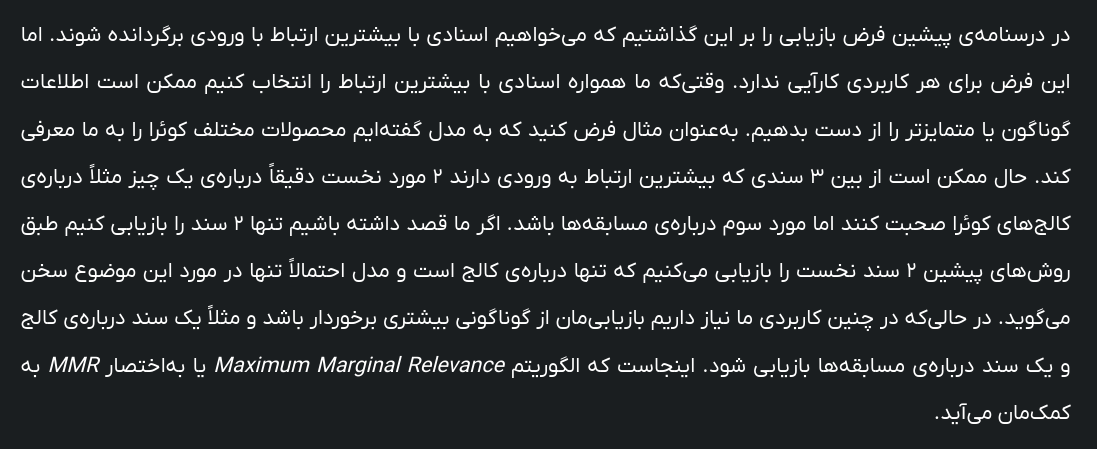

![Screenshot from 2025-03-28 16-23-16.png](<attachment:Screenshot from 2025-03-28 16-23-16.png>)
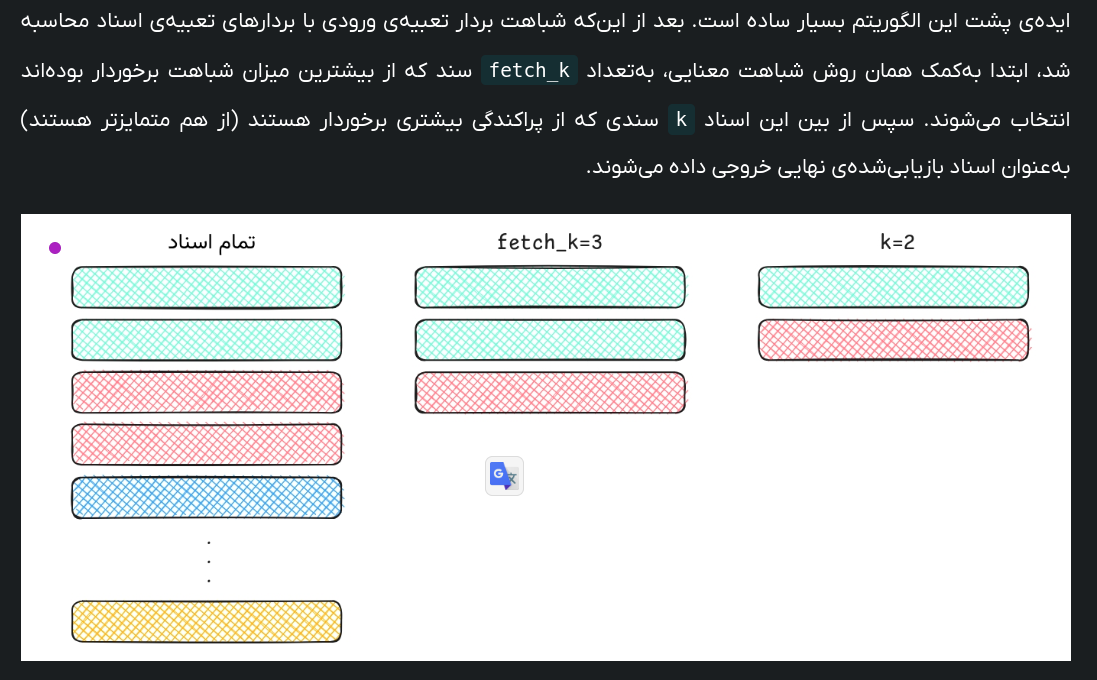

In [6]:
## Simple method (retrieve just top relevants)

query = 'گندالف خاکستری با گندالف سفید چه تفاوتی داشت؟'

results = vectorStore.similarity_search_with_score(
    query,
    k=2
)

for result, score in results:
    print('Document Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('Score:', score)
    print('-'*100)

Document Title: ارباب حلقه‌ها: بازگشت پادشاه
Document Content: و گریما با زدن خنجری به پشتش، او را به پایین برج پرت میکند و او به طرز فجیعی کشته میشود و گریما هم توسط لگولاس کشته میشود. در این بین پپین گوی جادویی را پیدا میکند که گندالف بلافاصله گوی را از او میگیرد.
Score: 1.2104735374450684
----------------------------------------------------------------------------------------------------
Document Title: ارباب حلقه‌ها: بازگشت پادشاه
Document Content: اِنتها از برج آیزنگارد محافظت می‌کنند و مری و پپین هم در حال خوش گذراندن هستند که گندالف و همراهانش به آنجا میرسند. در حالی که سارومان به همراه گریما در برج خود گیر افتاده است. پس از یک مشاجره سارومان از دست گریما خشمگین شده و گریما با زدن خنجری به پشتش،
Score: 1.2843974828720093
----------------------------------------------------------------------------------------------------


In [7]:
## MMR method

results = vectorStore.max_marginal_relevance_search(
    query,
    fetch_k=5,
    k=2
)

for result in results:
    print('Document Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)


Document Title: ارباب حلقه‌ها: بازگشت پادشاه
Document Content: و گریما با زدن خنجری به پشتش، او را به پایین برج پرت میکند و او به طرز فجیعی کشته میشود و گریما هم توسط لگولاس کشته میشود. در این بین پپین گوی جادویی را پیدا میکند که گندالف بلافاصله گوی را از او میگیرد.
----------------------------------------------------------------------------------------------------
Document Title: ارباب حلقه‌ها: حلقه‌های قدرت (فصل ۲)
Document Content: «عموماً مطلوب» است. منتقدان عموماً احساس کردند که عوامل فنی تولید فصل دوم همچنان در سطح بالایی است و عناصر بصری، کار طراحی و موسیقی مک‌کرری را ستایش کردند. همچنین دیده می‌شود که این فصل نسبت به فصل نخست در داستان‌سرایی خود مطمئن‌تر بوده است؛ اگرچه منتقدان
----------------------------------------------------------------------------------------------------


## Self Query

![Screenshot from 2025-03-28 16-39-33.png](<attachment:Screenshot from 2025-03-28 16-39-33.png>)
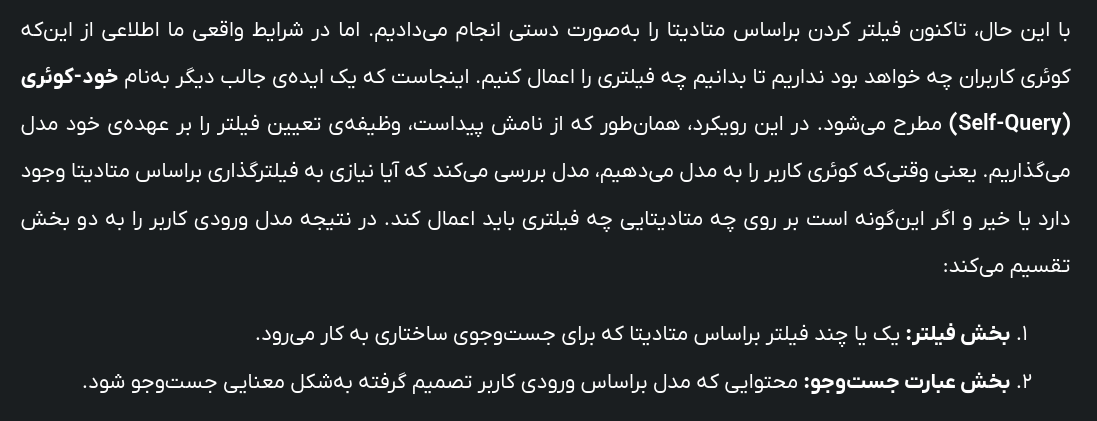

In [8]:
import pandas as pd

df = pd.read_csv("../../data/imdb_top_1000.csv")
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [9]:
# Check the length of the Overview text and decide wheter to split documents into smaller chunks or not
print('Minimum length of Overview text:', df['Overview'].str.len().min())
print('Average length of Overview text:', df['Overview'].str.len().mean())
print('Maximum length of Overview text:', df['Overview'].str.len().max())

Minimum length of Overview text: 40
Average length of Overview text: 146.255
Maximum length of Overview text: 313


In [10]:
df.loc[[0]]['Overview']

0    Two imprisoned men bond over a number of years...
Name: Overview, dtype: object

## Load pandas dataframe by langchain

In [11]:
from langchain_community.document_loaders import DataFrameLoader

df_loader = DataFrameLoader(
    df,
    page_content_column="Overview"
)

df_docs = df_loader.load()

print("Number of documents:", len(df_docs))
print("First 5 documents:")
df_docs[:5]

Number of documents: 1000
First 5 documents:


[Document(metadata={'Poster_Link': 'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UX67_CR0,0,67,98_AL_.jpg', 'Series_Title': 'The Shawshank Redemption', 'Released_Year': 1994, 'Certificate': 'A', 'Runtime': '142 min', 'Genre': 'Drama', 'IMDB_Rating': 9.3, 'Meta_score': 80.0, 'Director': 'Frank Darabont', 'Star1': 'Tim Robbins', 'Star2': 'Morgan Freeman', 'Star3': 'Bob Gunton', 'Star4': 'William Sadler', 'No_of_Votes': 2343110, 'Gross': '28,341,469'}, page_content='Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'),
 Document(metadata={'Poster_Link': 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg', 'Series_Title': 'The Godfather', 'Released_Year': 1972, 'Certificate': 'A', 'Runtime': '175 min', 'Genre': 'Crime, Drama', 'IMDB_Rating': 9.2, 'Meta_s

In [12]:
from langchain.vectorstores import Chroma

vector_store = Chroma.from_documents(
    documents = df_docs,
    embedding = embeddings, 
    collection_name = "top_movies", 
    persist_directory = "./imdb",
)

INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v1/embed "HTTP/1.1 200 OK"


In [13]:
print(f"The total number of documents in the collection: {vector_store._collection.count()}")

The total number of documents in the collection: 2000


In [14]:
## Simple search - some of the important parameters weren't handled by model

query = 'در سال ۲۰۱۶ چه فیلم‌هایی درباره‌ی آدم فضایی‌ها منتشر شد که امتیاز بالای ۷ دارند؟'

results = vector_store.similarity_search(query, k = 4)

for i, result in enumerate(results):
    print('Title:', result.metadata['Series_Title'])
    print(f"Year: {result.metadata['Released_Year']} | Rating: {result.metadata['IMDB_Rating']} | Genre: {result.metadata['Genre']}")
    print('Overview/Summary:\n', result.page_content)
    print('-'*100)

Title: The Right Stuff
Year: 1983 | Rating: 7.8 | Genre: Adventure, Biography, Drama
Overview/Summary:
 The story of the original Mercury 7 astronauts and their macho, seat-of-the-pants approach to the space program.
----------------------------------------------------------------------------------------------------
Title: The Right Stuff
Year: 1983 | Rating: 7.8 | Genre: Adventure, Biography, Drama
Overview/Summary:
 The story of the original Mercury 7 astronauts and their macho, seat-of-the-pants approach to the space program.
----------------------------------------------------------------------------------------------------
Title: Wonder
Year: 2017 | Rating: 8.0 | Genre: Drama, Family
Overview/Summary:
 Based on the New York Times bestseller, this movie tells the incredibly inspiring and heartwarming story of August Pullman, a boy with facial differences who enters the fifth grade, attending a mainstream elementary school for the first time.
----------------------------------------

### Define Metadata filters

![Screenshot from 2025-03-28 17-04-25.png](<attachment:Screenshot from 2025-03-28 17-04-25.png>)
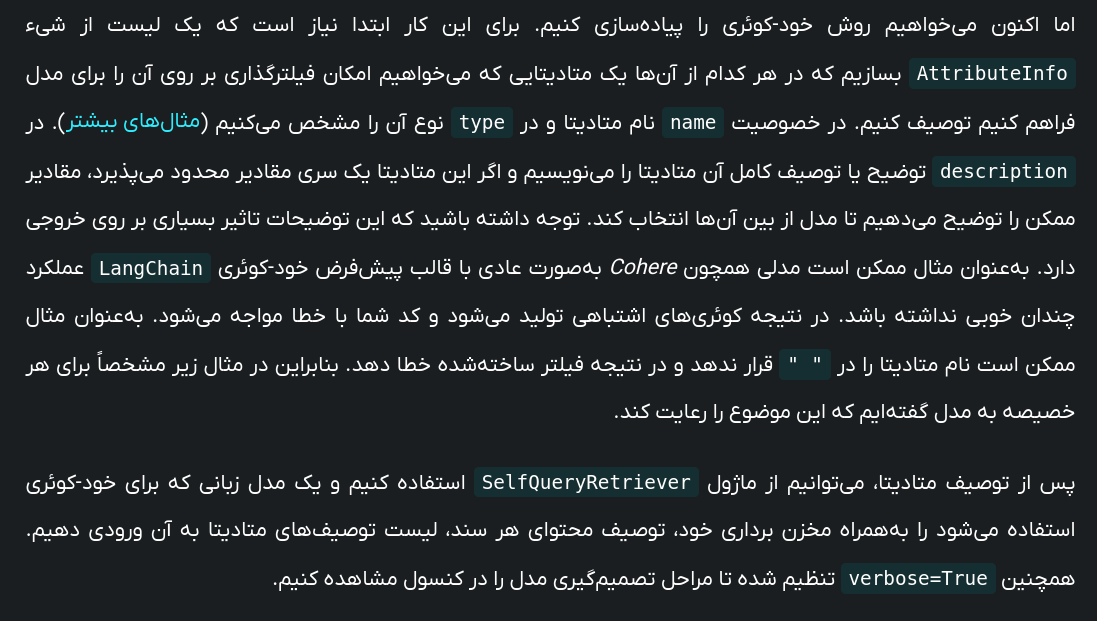

In [15]:
!pip install lark

In [16]:
from langchain.chains.query_constructor.base import AttributeInfo

metadata_field_info = [
    AttributeInfo(
        name="Released_Year",
        description="The year the movie was released. You must put Released_Year in quotes like \"Released_Year\"",
        type="integer",
    ),
    AttributeInfo(
        name="IMDB_Rating",
        description="A 1-10 rating for the movie. You must put IMDB_Rating in quotes like \"IMDB_Rating\"",
        type="float,",
    )
]

### Self-query Retrieval

In [17]:
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_cohere import ChatCohere
from langchain.retrievers.self_query.chroma import ChromaTranslator

doc_content_description = "Brief summary of the movie."
llm = ChatCohere(cohere_api_key=cohere_api_key,
                 temperature=0,
                 max_retries=3,
                 request_timeout=20
                )

retriever = SelfQueryRetriever.from_llm(
    llm,
    vector_store,
    doc_content_description,
    metadata_field_info,
    verbose=True
)

In [18]:
import logging

logging.basicConfig(level=logging.INFO)

ERROR:backoff:Giving up send_request(...) after 4 tries (requests.exceptions.SSLError: HTTPSConnectionPool(host='us.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)'))))


### invoke query from self-query retriever

In [19]:
query = 'در سال ۲۰۱۶ چه فیلم‌هایی درباره‌ی آدم فضایی‌ها منتشر شد که امتیاز بالای ۷ دارند؟'
results = retriever.invoke(query)

print('-'*100)
for i, result in enumerate(results):
    print('Title:', result.metadata['Series_Title'])
    print(f"Year: {result.metadata['Released_Year']} | Rating: {result.metadata['IMDB_Rating']} | Genre: {result.metadata['Genre']}")
    print('Overview/Summary:\n', result.page_content)
    print('-'*100)

INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"
INFO:langchain.retrievers.self_query.base:Generated Query: query='آدم فضایی\u200cها' filter=Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='Released_Year', value=2016), Comparison(comparator=<Comparator.GT: 'gt'>, attribute='IMDB_Rating', value=7.0)]) limit=None


----------------------------------------------------------------------------------------------------
Title: Arrival
Year: 2016 | Rating: 7.9 | Genre: Drama, Sci-Fi
Overview/Summary:
 A linguist works with the military to communicate with alien lifeforms after twelve mysterious spacecrafts appear around the world.
----------------------------------------------------------------------------------------------------
Title: Arrival
Year: 2016 | Rating: 7.9 | Genre: Drama, Sci-Fi
Overview/Summary:
 A linguist works with the military to communicate with alien lifeforms after twelve mysterious spacecrafts appear around the world.
----------------------------------------------------------------------------------------------------
Title: Hidden Figures
Year: 2016 | Rating: 7.8 | Genre: Biography, Drama, History
Overview/Summary:
 The story of a team of female African-American mathematicians who served a vital role in NASA during the early years of the U.S. space program.
------------------------

![Screenshot from 2025-03-28 17-20-44.png](<attachment:Screenshot from 2025-03-28 17-20-44.png>)
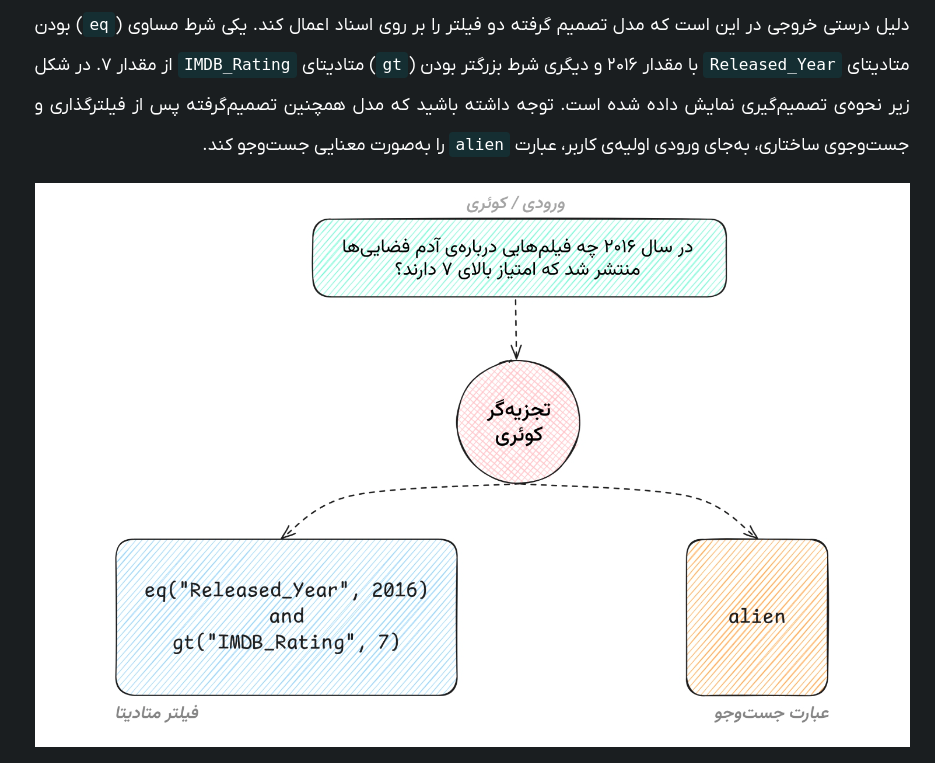

![Screenshot from 2025-03-28 17-22-34.png](<attachment:Screenshot from 2025-03-28 17-22-34.png>)
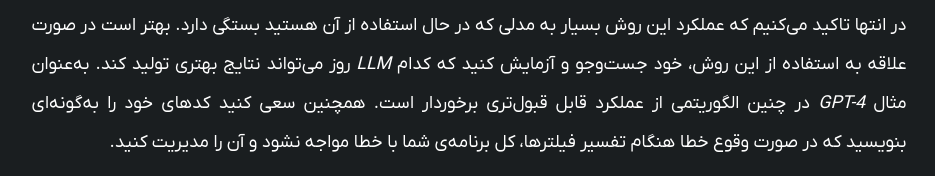

## Contexual compression - (???)

![Screenshot from 2025-03-28 21-49-51.png](<attachment:Screenshot from 2025-03-28 21-49-51.png>)
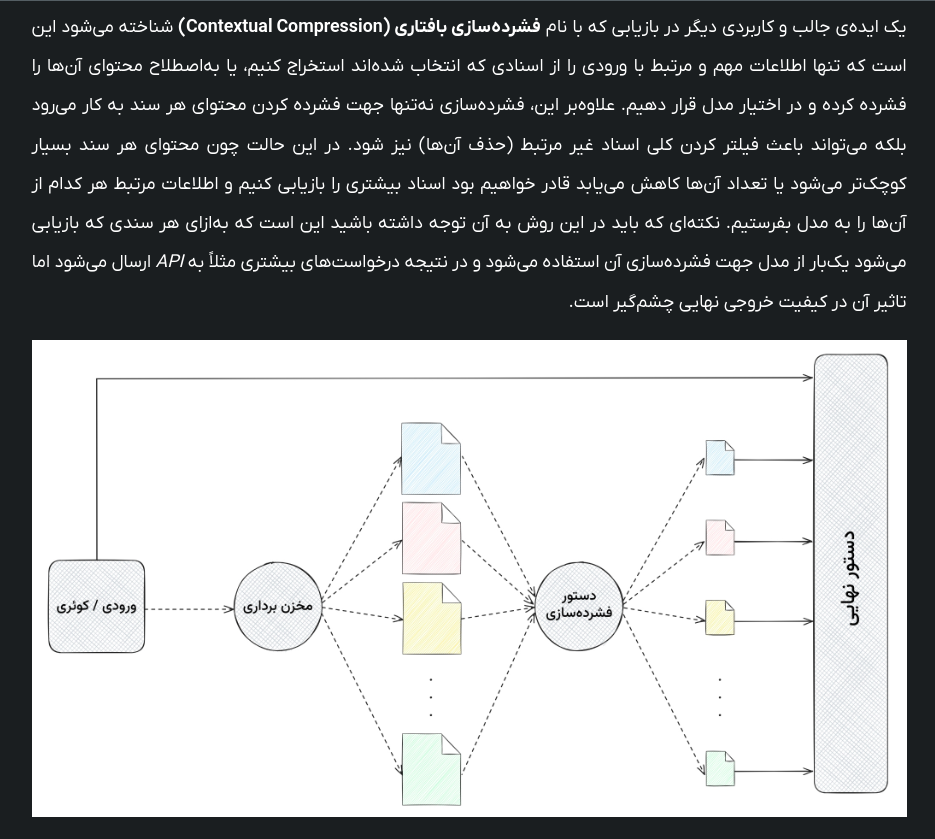

In [21]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor


compressor = LLMChainExtractor.from_llm(llm)
retriever = vectorStore.as_retriever(search_kwargs={"k": 3})

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=retriever
)

compressed_docs = compression_retriever.invoke(
    'ارباب حلقه‌های سوم چند جایزه‌ی گلدن گلوب برنده شد؟'
)

INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"


In [22]:
for i, result in enumerate(compressed_docs):
    print('Document #', i)
    # print('Document Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)


Document # 0
Document Content: NO_OUTPUT.
----------------------------------------------------------------------------------------------------
Document # 1
Document Content: NO_OUTPUT.
----------------------------------------------------------------------------------------------------
Document # 2
Document Content: NO_OUTPUT.
----------------------------------------------------------------------------------------------------


In [24]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_cohere import ChatCohere

llm = ChatCohere(cohere_api_key=cohere_api_key)
compressor = LLMChainExtractor.from_llm(llm)
retriever = vectorStore.as_retriever(
    search_kwargs = {"k": 3},
)

compression_retriever = ContextualCompressionRetriever(
    base_compressor = compressor,
    base_retriever = retriever
)

compressed_docs = compression_retriever.invoke(
    'ارباب حلقه‌های سوم چند جایزه‌ی گلدن گلوب برنده شد؟'
)

for i, result in enumerate(compressed_docs):
    print('Document #', i)
    print('Document Title:', result.metadata['title'])
    print('Document Content:', result.page_content)
    print('-'*100)

INFO:httpx:HTTP Request: GET https://api.cohere.com/v1/models?endpoint=chat&default_only=true "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.cohere.com/v2/chat "HTTP/1.1 200 OK"


Document # 0
Document Title: ارباب حلقه‌ها: یاران حلقه
Document Content: NO_OUTPUT.

The context provided does not contain any information about the number of Golden Globe awards won by "The Lord of the Rings: The Return of the King" (ارباب حلقه‌های سوم). It only mentions the film's recognition at the Oscars.
----------------------------------------------------------------------------------------------------
Document # 1
Document Title: ارباب حلقه‌ها (مجموعه‌فیلم)
Document Content: NO_OUTPUT.
----------------------------------------------------------------------------------------------------
Document # 2
Document Title: ارباب حلقه‌ها: بازگشت پادشاه
Document Content: NO_OUTPUT.
----------------------------------------------------------------------------------------------------
